# Exercise 3


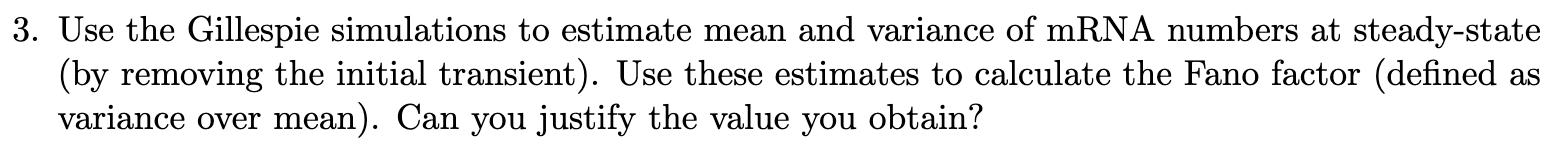


In [1]:
# load simulation results
import json

with open("ex2_sims.json") as f:
    simulation_results = json.loads(f.read())

In [2]:
import numpy as np

fano_factors = []
for sim in simulation_results:
    mrna = sim[1]
    # arbitraty cutoff (could be determined by the point where mean becomes stable)
    steady_state_values = np.array(mrna[100:])
    fano_factors.append(np.var(steady_state_values) /
                        np.mean(steady_state_values))

In [3]:
print("Fano factors", fano_factors)
print("Fano factors mean", np.mean(fano_factors))

Fano factors [0.9684764205883014, 0.8543075528942102, 0.903903072659026, 0.9223204921827409, 0.999043922799145]
Fano factors mean 0.9296102922246847


Let's have a look at the distribution of the mRNA levels for each simulation:


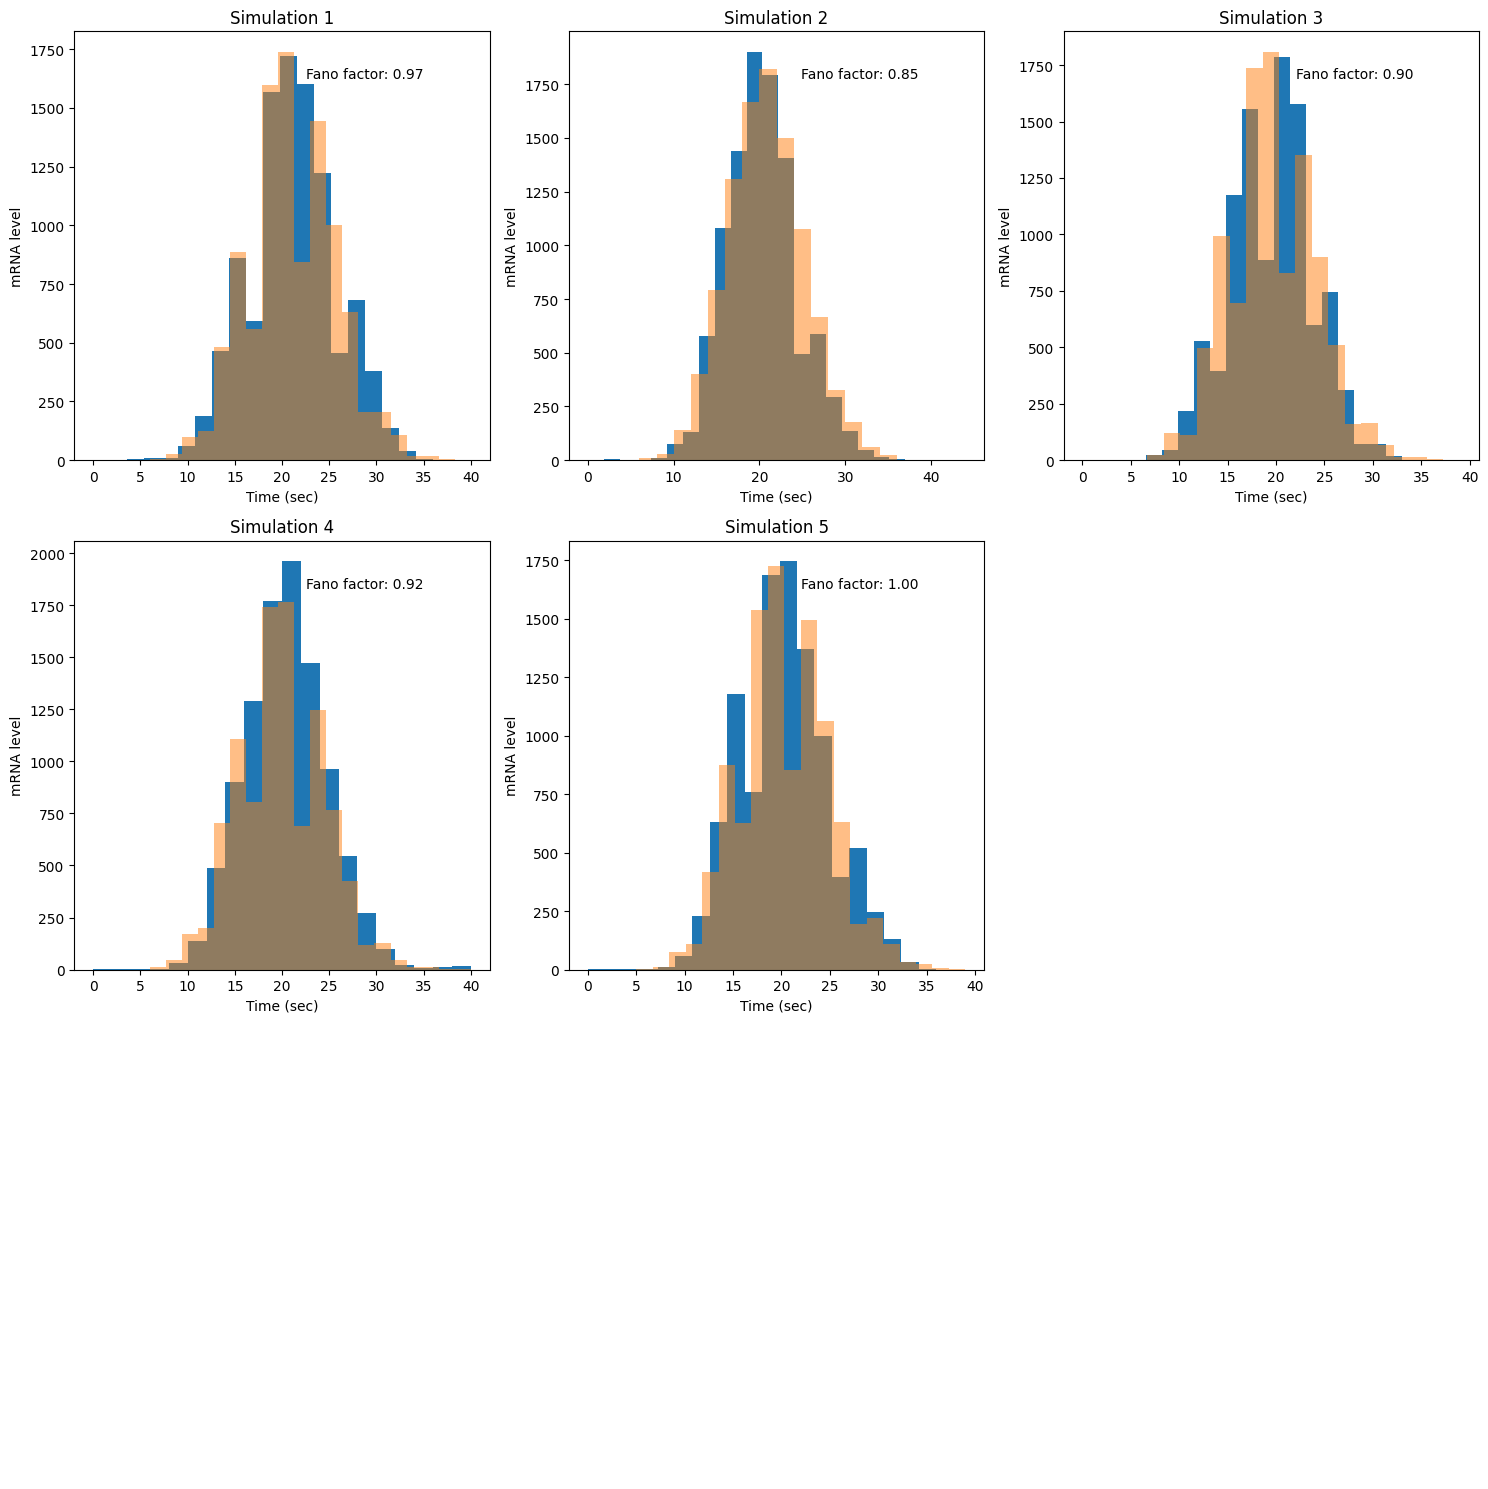

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations
num_sims = len(simulation_results)

# Determine the grid size (for example, square root rounded up for both rows and columns)
grid_size = int(np.ceil(np.sqrt(num_sims)))

# Create subplots
fig, axs = plt.subplots(
    grid_size, grid_size, figsize=(15, 15)
)  # Adjust figsize as needed

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot each simulation
for i, sim in enumerate(simulation_results):
    time, mrna = sim
    axs[i].hist(mrna, bins=20)  # Plot the histogram
    axs[i].set_title(f"Simulation {i+1}")  # Set the title for each subplot
    axs[i].set_xlabel("Time (sec)")
    axs[i].set_ylabel("mRNA level")
    # plot a poisson distribution with the same mean
    axs[i].hist(np.random.poisson(np.mean(mrna), 10000), bins=20, alpha=0.5)
    # display the fano factor in the right upper corner
    axs[i].text(
        0.7,
        0.9,
        f"Fano factor (simulation): {fano_factors[i]:.2f}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=axs[i].transAxes,
    )

# Hide any unused subplots
for i in range(num_sims, len(axs)):
    axs[i].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

Observation: The fano factors are all close to one.
Reason: In the lecture, it was shown that the transcription levels can be modeled using the chemical master equation. The chemical master equation is also to be shown to be solved by a poisson distribution at steady state. A poisson distribution has mean of lambda and variance of lambda. Lambda in our case represents the mean mRNA level at steady state. Thus, the theoretical Fano Factor is lambda/lambda = 1. As these are stochastic processes, the exact fano factors vary but should be closer to one for longer simulations.
